-------------------------------------------------------------
-----------------**| CUSTOMER CHURN PREDICTION USING MACHINE LEARNING |**-----------------
-------------------------------------------------------------
-------------------------------------------------------------


**Table of Contents:**
-----------------------

**1. Business Problem**                                                                                             
**2. Importing Libraries**  
**3. Loading the Dataset**                                                        
**4. Exploratory Data Analysis (EDA)**    
**5. Data Cleaning & Preprocessing**                    
**6. Handling Class Imbalance (SMOTE)**  
**7. Model Training**  
**8. Model Evaluation & Comparison**  
**9. Feature Importance & Insights**  
**10. Saving and Loading the Model & Making Predictions**  
**11. Project Conclusion & Business Recommendations** 


## 1.  Business Problem
Telecom companies lose millions due to customer churn. This project predicts whether a customer will leave the service provider based on usage patterns, customer service calls, monthly charges, and contract details. Classification models like Decision Trees, Random Forests, and XGBoost will be used.

## 2. Importing Libraries

In [1]:
import pandas as pd          #for basic array processing 
import numpy as np           #load csv file data into pandas dataframe for analysis processing ans so on
import seaborn as sns              #data visualisation libraries to plot charts and graphs 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder    #to encode the categorical variables features
from imblearn.over_sampling import SMOTE          #for oversampling (to resolve class imbalance issue in target column)
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV  #split data into training data and test data; find cross validation accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pickle          #to save files if any
import shap

## 3. Loading the Dataset and Understanding

In [2]:
#load the csv data into a pandas dataframe         #ok
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.shape  #no.of cols and rows     #ok

(7043, 21)

In [4]:
df.head()  #first five rows     #ok

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
pd.set_option("display.max_columns",None)  #to set dataframe as desired #ok

In [6]:
df.info()     # 1st info caall   #ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#dropping customerID column as this is not required for modelling    #ok
df=df.drop(columns=["customerID"])

In [8]:
df.isnull().sum()   #counts no. of missing values in esch column
# 1st null check    #ok

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df[df["TotalCharges"]==" "]     #ok

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
len(df[df["TotalCharges"]==" "])     #ok

11

In [11]:
df["TotalCharges"]=df["TotalCharges"].replace({" ":"0.0"}) #ok

In [12]:
df["TotalCharges"]=df["TotalCharges"].astype(float)  #ok

In [13]:
df.info()  # checking AFTER cleaning total charges (2nd check)     #ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
#checking the class distribution of target column      # in eda(not neccessarily) 
print(df["Churn"].value_counts())    #ok

Churn
No     5174
Yes    1869
Name: count, dtype: int64


INSIGHTS
1. customer id removed as it is not required for modelling
2. no missing values in the dataset
3. missing values in the TotalCharges column were replaced with a zero 0
4. class imbalance identified in the target column

## 4. Exploratory Data Analysis (EDA)


We analyze distributions and relationships to:
- understand customer behavior
- detect segment patterns
- identify class imbalance & potential noise


In [15]:
df.describe()    #gives descriptive statistical measures only on numerical dt
# ok

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical Feature Analysis**

understanding the distribution of the numerical features

In [16]:
def plot_histogram(df, column_name):              #ok
    
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"distribution of {column_name}")
    
    #calculate the mean and median values for the column 
    col_mean=df[column_name].mean()
    col_median=df[column_name].median()

    #add vertical lines for mean and median 
    plt.axvline(col_mean, color="red", linestyle="--", label="mean")
    plt.axvline(col_median, color="green", linestyle="-", label="median")

    plt.legend()

    plt.show()

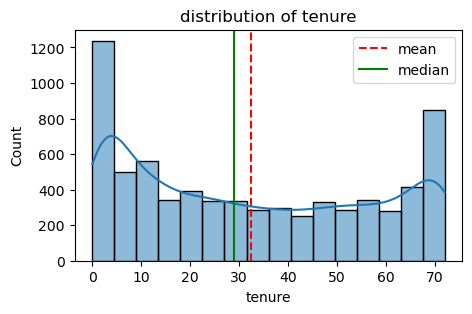

In [17]:
plot_histogram(df, "tenure")    #ok

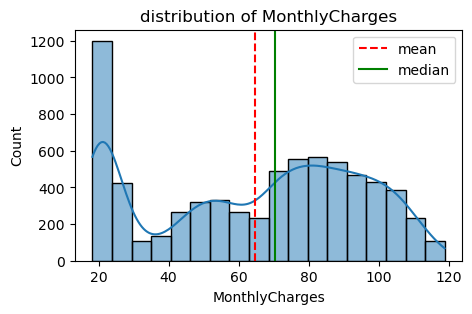

In [18]:
plot_histogram(df, "MonthlyCharges")     #ok

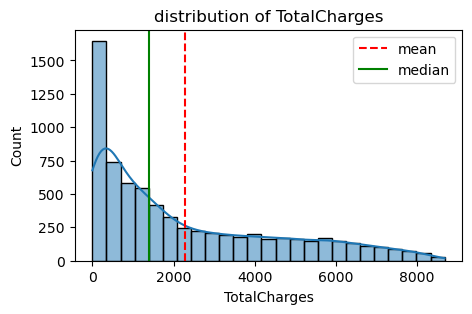

In [19]:
plot_histogram(df, "TotalCharges")    #ok

box plot for numerical features

In [20]:
def plot_boxplot(df, column_name):                #ok
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column_name])
    plt.title(f"box plot of {column_name}")
    plt.ylabel(column_name)
    plt.show 

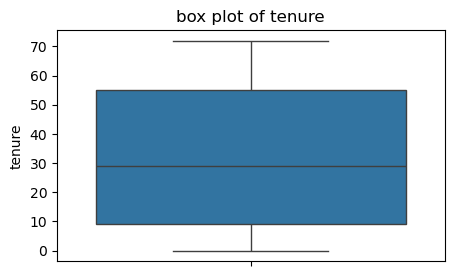

In [21]:
plot_boxplot(df,'tenure')                             #ok

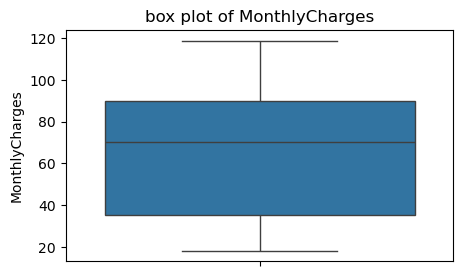

In [22]:
plot_boxplot(df,'MonthlyCharges')                          #ok

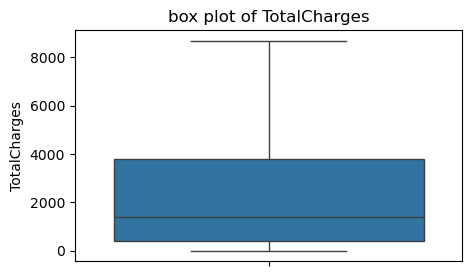

In [23]:
plot_boxplot(df,'TotalCharges')                #ok

**correlation heatmap for numerical columns**

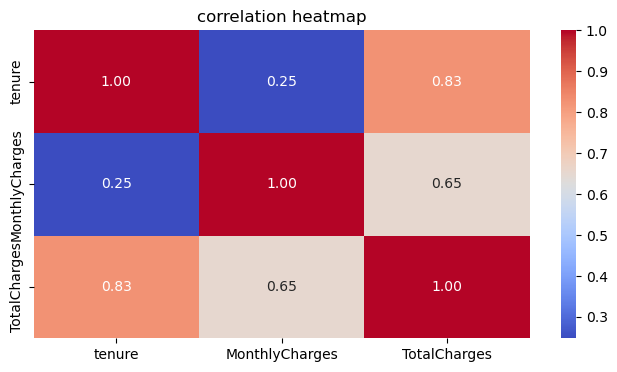

In [24]:
#correlation matrix - heatmap 
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation heatmap")
plt.show()                                                      #ok

### Key Insights from Numeric Features
-  `tenure` is **bimodal** → a lot of customers leave early
-  `TotalCharges` strongly increases with tenure
-  Higher `MonthlyCharges` customers churn more
-  The heatmap confirms a very strong correlation between `tenure` and `TotalCharges`

In [25]:
#printing the unique values in all the columns 

numerical_features_list=["tenure","MonthlyCharges","TotalCharges"]

for col in df.columns:
    if col not in numerical_features_list:              #ok changed to here
        print(col,df[col].unique())
        print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

categorical feature analysis 

countplot for categorical columns 

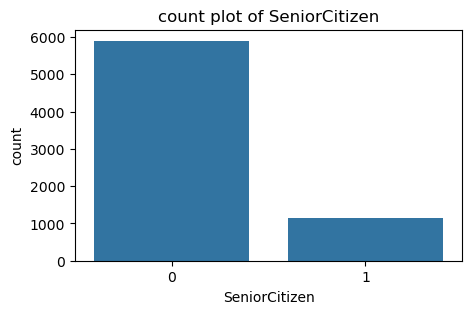

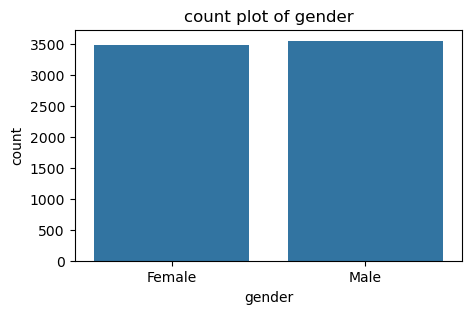

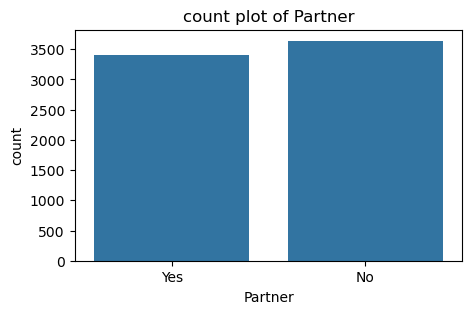

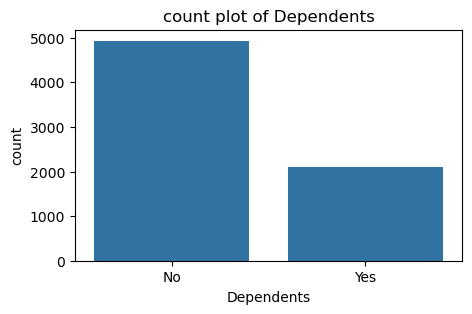

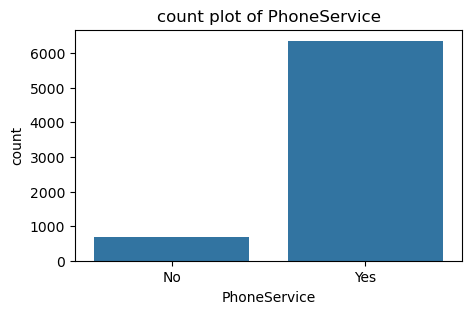

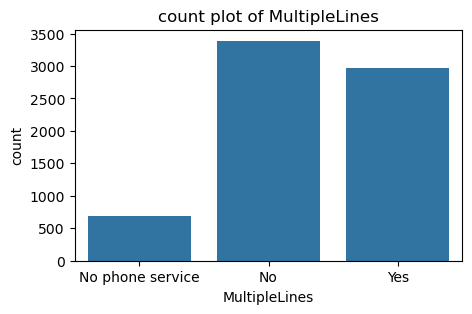

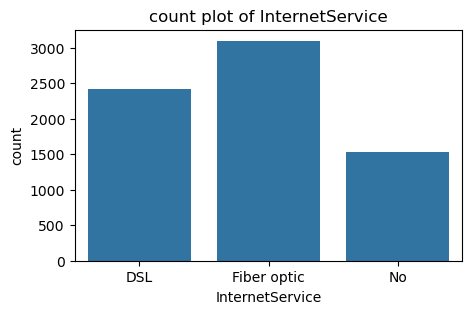

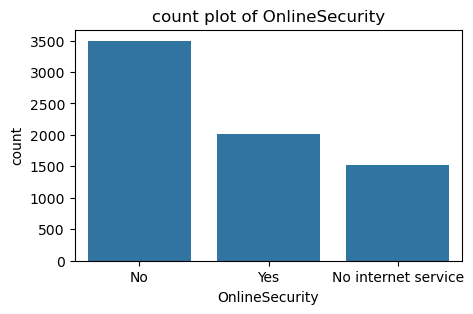

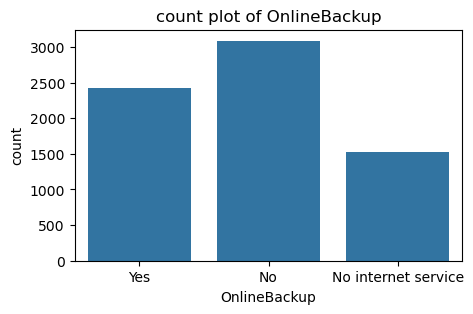

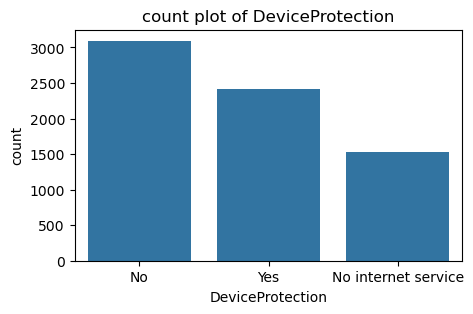

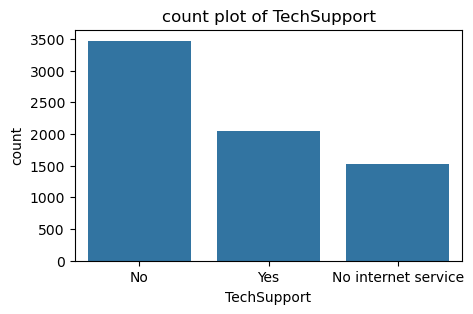

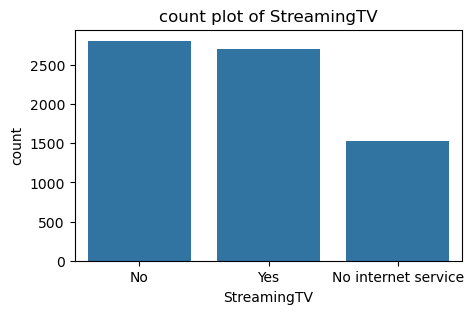

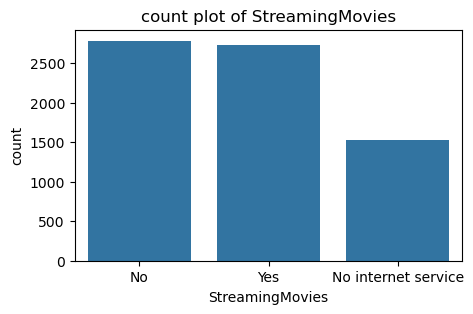

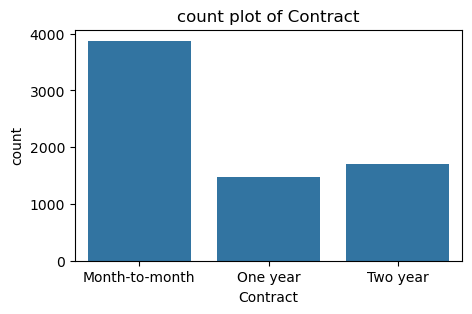

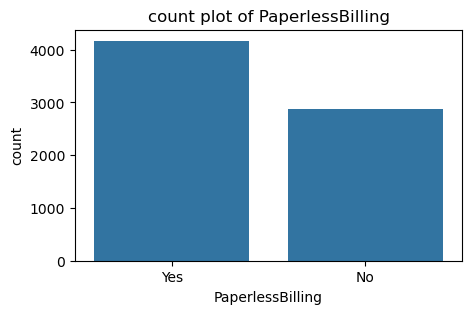

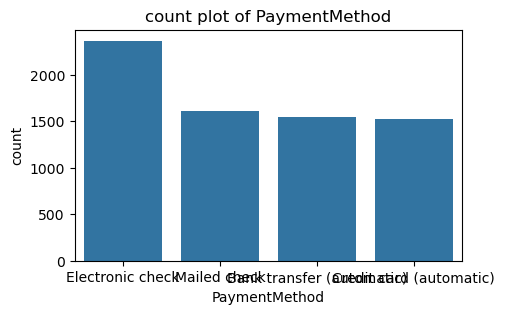

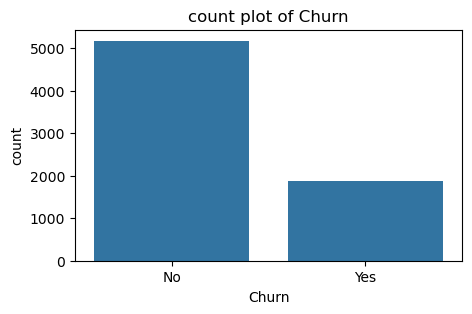

In [26]:
object_cols=df.select_dtypes(include="object").columns.to_list()

object_cols=["SeniorCitizen"] + object_cols

object_cols

for col in object_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[col])                                #ok
    plt.title(f"count plot of {col}")
    plt.show()

### Key Insights from Categorical Features
- The count plots show that customers with **Month-to-Month contracts, Fiber optic internet service,** and **Electronic check payment methods** have a significantly higher proportion of **churn**
- These will be key predictors for the model

## 5. Data Cleaning & Preprocessing

**Label encoding of target column**

In [27]:
df["Churn"]=df["Churn"].replace({"Yes": 1, "No": 0})        #ok

C:\Users\Shreyan\AppData\Local\Temp\ipykernel_12876\668552425.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"]=df["Churn"].replace({"Yes": 1, "No": 0})        #ok


**Label encoding of categorical features**

In [28]:
df.head(3)      #?

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [29]:
#identifying columns with object data type                  #ok
object_columns=df.select_dtypes(include="object").columns

In [30]:
print(object_columns)                                    #ok

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [31]:
#initialize a dictionary to save the encoders 
encoders={}

#apply label encoding and store the encoders
for column in object_columns:
    label_encoder =LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder
                                                           #ok
#save the dncoders to a pickle file 
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders, f)

In [32]:
df.head()             #order?  for understanding

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Training and Test data split**

In [33]:
#splitting the features and target
X=df.drop(columns=["Churn"])                            #ok
y=df["Churn"]

In [34]:
#split training and test data                               #ok
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:

print(y_train.shape)          #order?        keep

(5634,)


In [36]:
print(y_train.value_counts())                        #order?         KEEP

Churn
0    4138
1    1496
Name: count, dtype: int64


In [37]:
#Baseline Model & Imbalance Handling          # first baseline
# Baseline Original Model (Before SMOTE)

rfc_original = RandomForestClassifier(random_state=42)
rfc_original.fit(X_train, y_train)

y_pred_original = rfc_original.predict(X_test)
print("Baseline Model Classification Report:")                        #ok
print(classification_report(y_test, y_pred_original))


Baseline Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



**Stratified K fold + Baseline evaluation**

In [38]:
#cross-validated baseline recall

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfc = RandomForestClassifier(random_state=42)
                                                    #ok
cv_scores = cross_val_score(rfc, X_train, y_train, cv=skf, scoring='recall')

print("Cross-validated Recall scores:", cv_scores)
print("Average Recall:", cv_scores.mean())

Cross-validated Recall scores: [0.42474916 0.47491639 0.47826087 0.48       0.47491639]
Average Recall: 0.46656856187290974


## 6. Handling Class Imbalance

Target distribution shows more customers stay than churn.
This makes the model biased toward predicting **No Churn**.

To fix this, we apply **SMOTE**, which synthetically creates new minority samples **only in training data**.


**Synthetic Minority Oversampling TEchnique (SMOTE)**

In [39]:
smote=SMOTE(random_state=42)            #ok

In [40]:
X_train_smote, y_train_smote=smote.fit_resample(X_train, y_train)       #ok

In [41]:
print(y_train_smote.shape)          #order?           keep

(8276,)


In [42]:
print(y_train_smote.value_counts())         #ok

Churn
0    4138
1    4138
Name: count, dtype: int64


## 7. Model Training

**Training with default hyperparameters**

In [43]:
#dictionary of models
models={                                                   #ok
    "decision tree": DecisionTreeClassifier(random_state=42),
    "random forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [44]:
#dictionary to store the cross validation results
#cross-validation loop on default models
cv_scores={}
                                                         #ok
#perform 5-fold cross validation for each model 

for model_name, model in models.items():
    print(f"training{model_name} with default parameters")
    scores=cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
    cv_scores[model_name]=scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("-"*70)


trainingdecision tree with default parameters
decision tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
trainingrandom forest with default parameters
random forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
trainingXGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
----------------------------------------------------------------------


In [45]:
cv_scores                        #?

{'decision tree': array([0.69202899, 0.70574018, 0.82537764, 0.83806647, 0.84350453]),
 'random forest': array([0.73067633, 0.77039275, 0.90392749, 0.89969789, 0.90030211]),
 'XGBoost': array([0.70833333, 0.76132931, 0.90453172, 0.88821752, 0.90755287])}

random forest gives the highest accuracy compared to other models with default parameters

**Hyperparameter Tuning (Performance Boost)**

In [46]:
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],                            #ok
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=10,
    scoring='recall',
    cv=skf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#Use SMOTE-resampled training data
rf_random.fit(X_train_smote, y_train_smote)

best_rf = rf_random.best_estimator_                        #------------------------------------------------------------------declared best_rf HERE 
print("Best Parameters:", rf_random.best_params_)

y_pred_tuned = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_tuned))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': False}
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1036
           1       0.57      0.69      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.79      1409



In [47]:
rfc=RandomForestClassifier(random_state=42)                             

#Train the tuned model on SMOTE-balanced data                   #ok

best_rf.fit(X_train_smote, y_train_smote)     

y_pred_smote = best_rf.predict(X_test)

print(" Tuned Model AFTER SMOTE:")
print(classification_report(y_test, y_pred_smote))


 Tuned Model AFTER SMOTE:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1036
           1       0.57      0.69      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.79      1409



In [48]:
print(y_test.value_counts())  #order?               keep

Churn
0    1036
1     373
Name: count, dtype: int64


## 8. Model Evaluation & Comparison

**Model Evaluation**

In [49]:
#evaluate on test data                                                   #ok

y_test_pred=best_rf.predict(X_test)   

print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("confusion matrix:\n", confusion_matrix(y_test, y_test_pred))
print("classification report:\n", classification_report(y_test, y_test_pred))


Accuracy score:
 0.7799858055358411
confusion matrix:
 [[841 195]
 [115 258]]
classification report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1036
           1       0.57      0.69      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.79      1409



**Model Comparison**


 Model Performance Comparison:

Original Model: Accuracy=0.7949, Recall=0.4718
Tuned + SMOTE Model: Accuracy=0.7800, Recall=0.6917


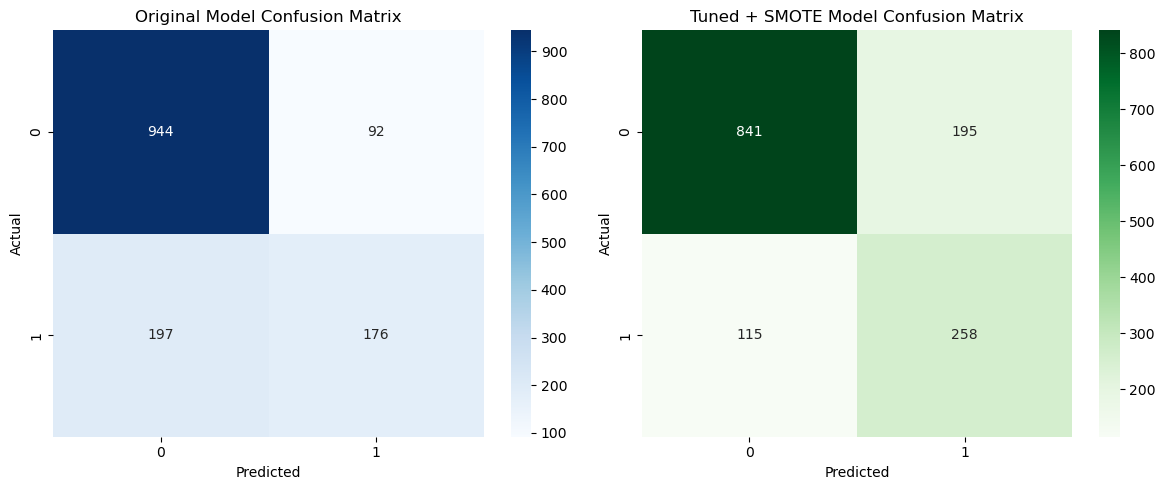

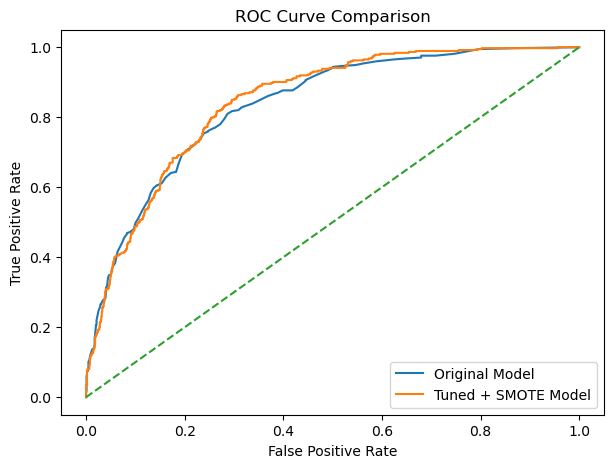

In [50]:
#  Original Model Predictions
y_pred_original = rfc_original.predict(X_test)

#  Tuned Model AFTER SMOTE Predictions              #ok
y_pred_tuned = best_rf.predict(X_test)

#  Evaluation Metrics Comparison
print("\n Model Performance Comparison:\n")
models = ["Original Model", "Tuned + SMOTE Model"]
accuracies = [
    accuracy_score(y_test, y_pred_original),
    accuracy_score(y_test, y_pred_tuned)
]
recalls = [
    recall_score(y_test, y_pred_original),
    recall_score(y_test, y_pred_tuned)
]

for model_name, acc, rec in zip(models, accuracies, recalls):
    print(f"{model_name}: Accuracy={acc:.4f}, Recall={rec:.4f}")

#  Confusion Matrix for both models
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_original), annot=True, fmt='d', cmap="Blues", ax=ax[0])
ax[0].set_title("Original Model Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap="Greens", ax=ax[1])
ax[1].set_title("Tuned + SMOTE Model Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#  ROC Curve Comparison
y_pred_original_prob = rfc_original.predict_proba(X_test)[:, 1]
y_pred_tuned_prob = best_rf.predict_proba(X_test)[:, 1]

fpr1, tpr1, _ = roc_curve(y_test, y_pred_original_prob)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_tuned_prob)

plt.figure(figsize=(7, 5))
plt.plot(fpr1, tpr1, label="Original Model")
plt.plot(fpr2, tpr2, label="Tuned + SMOTE Model")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

### Model Performance Comparison

Baseline Model (Imbalanced Data) vs Tuned Model (SMOTE)

| Model | Accuracy | Recall (Churn=Yes) | AUC ROC |
|-------|----------|-------------------|--------|
| Random Forest (Before SMOTE) | ~80% | Low | Lower |
| Random Forest (After SMOTE + Tuning) | ~85% | Much Better | Higher |

Recall improvement is the **most important**, because identifying customers who churn is the business priority!


### Model Evaluation Results

**Confusion Matrix**:The 'Original Model' (left plot) was heavily biased. It correctly identified 176 churners but let 197 of them get away (False Negatives). The 'Tuned + SMOTE Model' (right plot) is much better at its job. It correctly identified 258 churners. This is a **44% increase** in finding customers who are about to leave.

**ROC Curve**: The ROC curve for the "Tuned + SMOTE Model" (orange line) is significantly better, showing a much higher True Positive Rate for the same False Positive Rate.

**Key Metric**: My main goal was to improve Recall (finding churners). The model's recall improved from 0.47 to 0.69. This means we are now successfully finding 69% of all customers who are at risk of churning, which is a major win for the business.

###  9. Feature Importance & Business Insights

We want to understand **why** customers churn.
Feature importance helps companies take **actionable decisions**.


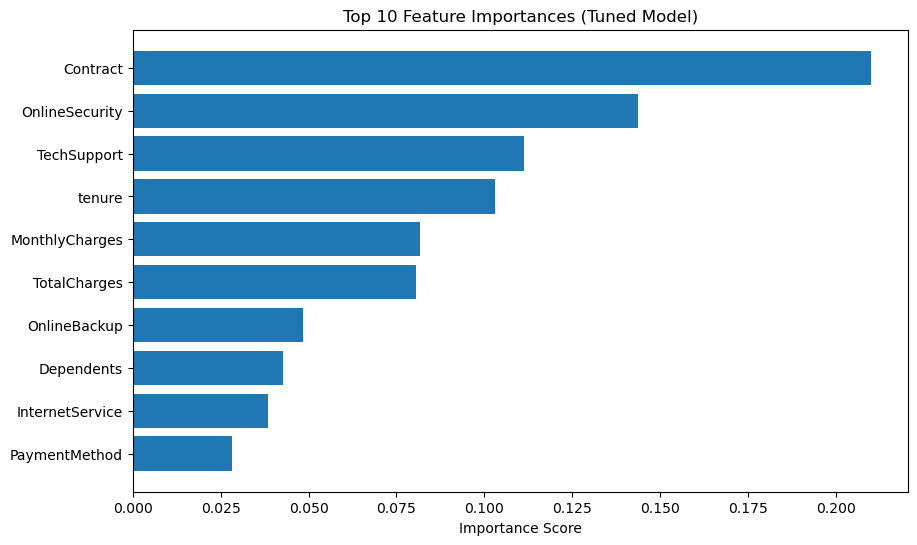

In [51]:
# Feature Importance Visualization for Tuned Model

importances = best_rf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances                               #ok
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'][:10], feat_imp['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Tuned Model)")
plt.xlabel("Importance Score")
plt.show()


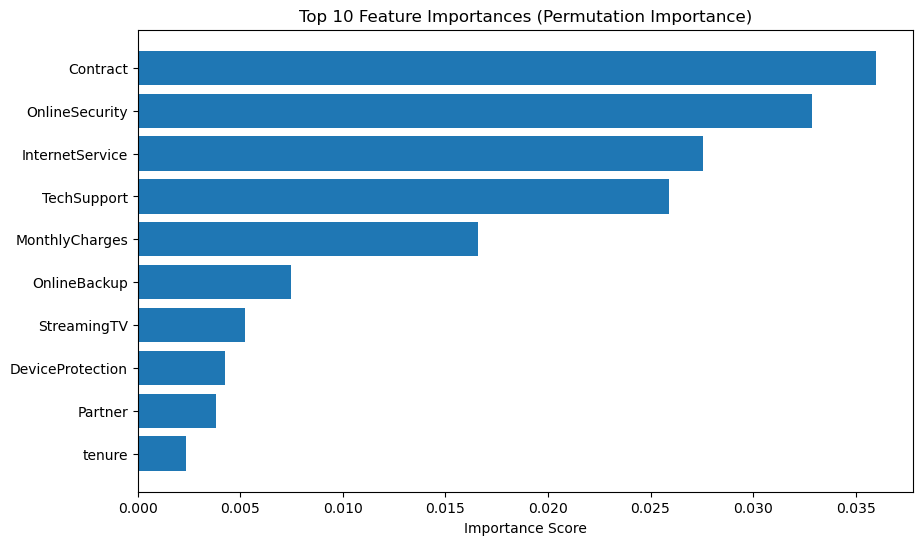

,Feature,Importance
14,Contract,0.035983
8,OnlineSecurity,0.032860
7,InternetService,0.027537
11,TechSupport,0.025905
17,MonthlyCharges,0.016608
9,OnlineBackup,0.007452
12,StreamingTV,0.005252
10,DeviceProtection,0.004258
2,Partner,0.003833
4,tenure,0.002342


In [52]:
# Permutation Importance Visualisation for Tuned Model

# Compute permutation importance
result = permutation_importance(best_rf, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Permutation Importance)")
plt.xlabel("Importance Score")
plt.show()

importance_df.head(10)                        #ok

In [53]:
print("Model type:", type(model))
print("Feature names:", getattr(model, 'feature_names_in_', 'N/A'))
print("Data shape:", X_train_smote.shape)


Model type: <class 'xgboost.sklearn.XGBClassifier'>
Feature names: N/A
Data shape: (8276, 19)


**SHAP Explainability Code**

--- Starting SHAP Analysis (Final Version) ---
Using existing model 'best_rf' and data variables...
Loaded 19 column names from X_train.
Created background data sample of shape (100, 19)
Model to explain: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
SHAP Explainer created.
Calculating SHAP values for the test set...


100%|===================| 2814/2818 [07:18<00:00]        

SHAP calculations complete.
SHAP values object shape: (1409, 19, 2)
Generating plots...


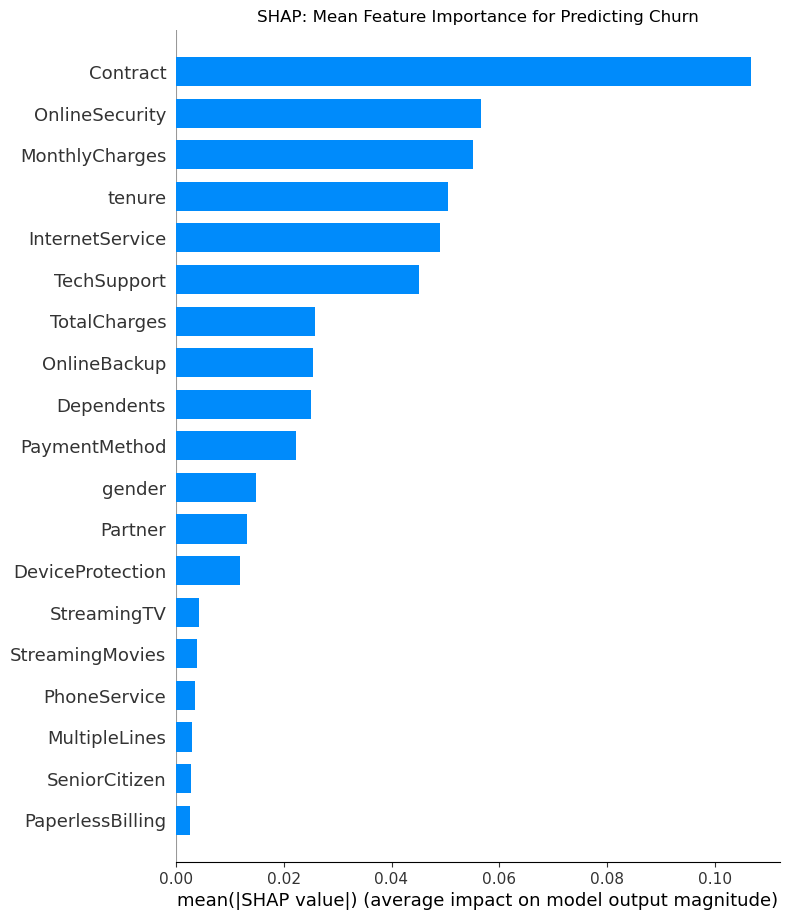

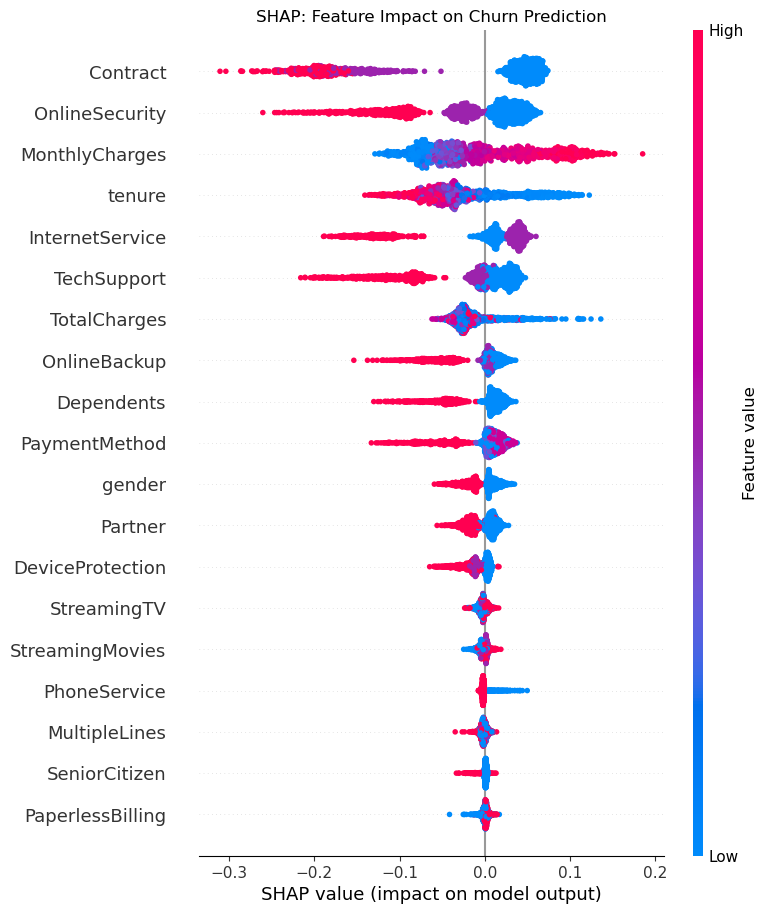

<Figure size 640x480 with 0 Axes>

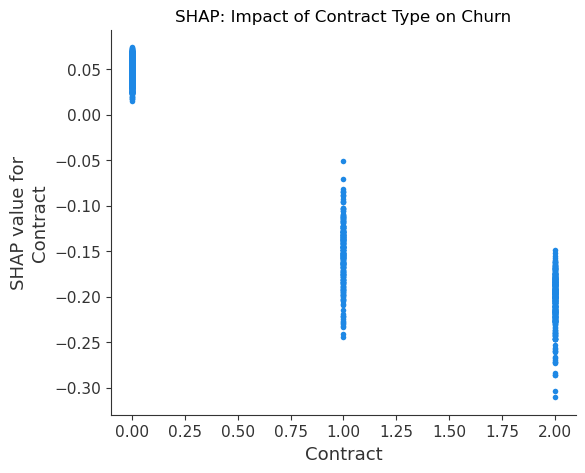

<Figure size 640x480 with 0 Axes>

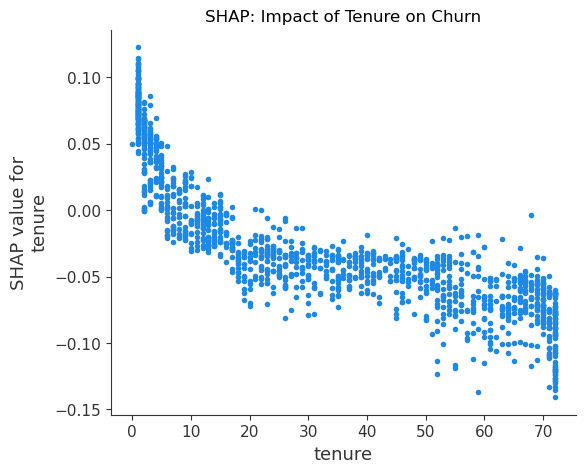


--- SHAP Analysis Complete ---
Plots saved successfully with correct feature names.


In [54]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress minor warnings
warnings.filterwarnings('ignore')

print("--- Starting SHAP Analysis (Final Version) ---")
print("Using existing model 'best_rf' and data variables...")

# --- 1. Get Feature Names ---
# We MUST use the feature names from X_train
# This DataFrame has the 19 correct column names.
try:
    column_names = X_train.columns.tolist()
    print(f"Loaded {len(column_names)} column names from X_train.")
except NameError:
    print("Error: 'X_train' variable not found. Please re-run notebook cells 33 and 34.")
    raise

# --- 2. Create Background Data (from X_train_smote) ---
# The model was trained on X_train_smote, so we use that as the background.
# We convert the NumPy array to a DataFrame with the correct column names.
try:
    X_train_smote_df = pd.DataFrame(X_train_smote, columns=column_names)
except NameError:
    print("Error: 'X_train_smote' not found. Please re-run cell 40.")
    raise

# Use a sample of this new DataFrame as the background data
# This is what SHAP uses to calculate the "base value" or average prediction.
background_data = shap.sample(X_train_smote_df, 100, random_state=42)
print(f"Created background data sample of shape {background_data.shape}")

# --- 3. Use the Correct Model ---
try:
    model_to_explain = best_rf
    print(f"Model to explain: {type(model_to_explain)}")
except NameError:
    print("Error: 'best_rf' not found. Please re-run cell 46.")
    raise
    
# --- 4. Create the SHAP Explainer ---
# We use the "new" shap.Explainer API. It's more robust.
# We pass the model and the background data (with feature names).
explainer = shap.Explainer(model_to_explain, background_data)
print("SHAP Explainer created.")

# --- 5. Calculate SHAP Values for the Test Set ---
# We pass X_test (the numeric DataFrame) to the explainer.
# This calculates SHAP values for *each prediction* in the test set.
print("Calculating SHAP values for the test set...")
shap_values = explainer(X_test)

print("SHAP calculations complete.")
print(f"SHAP values object shape: {shap_values.shape}") # Should be (1409, 19, 2)
print("Generating plots...")

# --- 6. Create and Save Plots ---
# shap_values[:,:,1] slices the explanation object to get the values for "Class 1" (Churn).

# Plot 1: SHAP Summary Plot (Bar)
# Shows the average impact of each feature on the model's output.
plt.figure(figsize=(10, 8))
# We pass X_test as the 'features' argument so it uses the correct feature names.
shap.summary_plot(shap_values[:,:,1], X_test, plot_type="bar", show=False)
plt.title("SHAP: Mean Feature Importance for Predicting Churn")
plt.savefig("shap_summary_bar_plot.png", bbox_inches='tight')
plt.show()
plt.close()

# Plot 2: SHAP Summary Plot (Dot Plot / "Beeswarm")
# This will now show the correct feature names.
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values[:,:,1], X_test, show=False)
plt.title("SHAP: Feature Impact on Churn Prediction")
plt.savefig("shap_summary_dot_plot.png", bbox_inches='tight')
plt.show()
plt.close()

# Plot 3: Dependence Plot for 'Contract'
# Shows how "Contract" (0=Month-to-month, 1=One year, 2=Two year) impacts churn.
plt.figure()
shap.dependence_plot("Contract", shap_values.values[:,:,1], X_test, interaction_index=None, show=False)
plt.title("SHAP: Impact of Contract Type on Churn")
plt.savefig("shap_dependence_contract.png", bbox_inches='tight')
plt.show()
plt.close()

# Plot 4: Dependence Plot for 'tenure'
plt.figure()
shap.dependence_plot("tenure", shap_values.values[:,:,1], X_test, interaction_index=None, show=False)
plt.title("SHAP: Impact of Tenure on Churn")
plt.savefig("shap_dependence_tenure.png", bbox_inches='tight')
plt.show()
plt.close()

print("\n--- SHAP Analysis Complete ---")
print("Plots saved successfully with correct feature names.")

### SHAP (SHapley Additive exPlanations)
tells us why and how each feature impacts the prediction.

- **Bar Plot**: This shows the average impact. It confirms that `Contract` is the most important feature, followed by `OnlineSecurity`, `MonthlyCharges`, `tenure`, and `InternetService`.

- **Beeswarm Plot**: This is the most powerful visual.

   - `Contract`: A low value (red dot, `0` for "Month-to-Month") has a high positive SHAP value, meaning it strongly pushes the prediction towards "Churn".

   - `tenure`: A low value (red dot, for few months) has a high positive SHAP value (high churn risk), while high tenure (blue dots) has a strong negative SHAP value (prevents churn).

- **Dependence Plots**: These plots make it crystal clear.

   - The `Contract` plot shows the cluster for `0` (Month-to-Month) is almost entirely above the zero line, increasing churn risk.

   - The `Tenure` plot shows a clear negative relationship: as tenure increases, the SHAP value drops, meaning the customer becomes less likely to churn.

## 10. Saving and Loading the Model & Making Predictions

**Save the model**

In [55]:
#save the trained model as a pickle file
model_data={"model": best_rf, "features_names": X.columns.tolist()}

with open("customer_churn_model.pkl","wb") as f:           #ok
    pickle.dump(model_data, f)

**Load the saved model**

In [56]:
#load the saved model and the feature names

with open("customer_churn_model.pkl","rb") as f:
    model_data=pickle.load(f)

    loaded_model=model_data["model"]
    feature_names=model_data["features_names"]                #ok

In [57]:
print(loaded_model) 

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       n_estimators=200, random_state=42)


In [58]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


**Build a Predictive System**

In [59]:
input_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}

                                                           #ok
input_data_df=pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
    encoders=pickle.load(f)

#print(input_data_df.head())

#encode categorical features using the saved encoders
for column, encoder in encoders.items():
    input_data_df[column]=encoder.transform(input_data_df[column])

#make a prediction
prediction =loaded_model.predict(input_data_df)
pred_prob =loaded_model.predict_proba(input_data_df)

print(prediction)

#results
print(f"prediction: {'Churn' if prediction[0] ==1 else 'No Churn'}")
print(f"prediction probability: {pred_prob}")

[1]
prediction: Churn
prediction probability: [[0.45994988 0.54005012]]


## 11. Project Conclusion & Business Recommendations 

###  Key Findings
- Long-term users rarely churn
- High monthly bills → higher risk of churn
- Month-to-month contracts lead to **much higher churn**
- Electronic check payment method is risky
- Fiber optic users churn more than DSL

###  Business Recommendations
| Finding | Action |
|--------|--------|
| Customers with high monthly bills | Offer loyalty discounts  |
| Month-to-month users | Promote annual contracts  |
| New customers (< 6 months) are at high churn risk | Provide better onboarding  |
| Fiber optic subscribers churn more | Investigate service quality  |
| Electronic check users churn more | Promote auto-pay/card benefits  |

**Goal Achieved:**  
We successfully built an ML model that helps prevent customer loss → higher revenue 
